# ProjectWork Deep Learning
https://www.kaggle.com/competitions/mlnomads-mlolympiad24/overview

## Import Libraries

In [1]:
import os
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm.auto import tqdm
from PIL import Image

## Data Loading

In [2]:
# Clone the repo
!git clone https://github.com/ireneburri/PW_DeepLearning.git

%cd PW_DeepLearning

fatal: destination path 'PW_DeepLearning' already exists and is not an empty directory.
/content/PW_DeepLearning


In [3]:
!ls Data

Image2.zip  Images  Images1.zip  Images2.zip  Masks  Masks.zip


In [4]:
# Unzip all 3 files
!unzip -j /content/PW_DeepLearning/Data/Masks.zip -d Data/Masks
!unzip -j /content/PW_DeepLearning/Data/Images1.zip -d Data/Images
!unzip -j /content/PW_DeepLearning/Data/Images2.zip -d Data/Images

Output streaming troncato alle ultime 5000 righe.
  inflating: Data/Masks/water_body_1812.jpg  
  inflating: Data/Masks/water_body_1813.jpg  
  inflating: Data/Masks/water_body_1814.jpg  
  inflating: Data/Masks/water_body_1815.jpg  
  inflating: Data/Masks/water_body_1816.jpg  
  inflating: Data/Masks/water_body_1817.jpg  
  inflating: Data/Masks/water_body_1818.jpg  
  inflating: Data/Masks/water_body_1819.jpg  
  inflating: Data/Masks/water_body_182.jpg  
  inflating: Data/Masks/water_body_1820.jpg  
  inflating: Data/Masks/water_body_1822.jpg  
  inflating: Data/Masks/water_body_1823.jpg  
  inflating: Data/Masks/water_body_1824.jpg  
  inflating: Data/Masks/water_body_1825.jpg  
  inflating: Data/Masks/water_body_1826.jpg  
  inflating: Data/Masks/water_body_1827.jpg  
  inflating: Data/Masks/water_body_1828.jpg  
  inflating: Data/Masks/water_body_1829.jpg  
  inflating: Data/Masks/water_body_183.jpg  
  inflating: Data/Masks/water_body_1830.jpg  
  inflating: Data/Masks/water_bo

In [5]:
IMG_DATA = "/content/PW_DeepLearning/Data/Images"
MASK_DATA = "/content/PW_DeepLearning/Data/Masks"
IMAGES =  next(os.walk(IMG_DATA))[2]
MASKS = next(os.walk(MASK_DATA))[2]

## Data Exploration

In [6]:
print(f"There are total of {len(IMAGES)} images and {len(MASKS)} masks in the given dataset.")

There are total of 2841 images and 2841 masks in the given dataset.


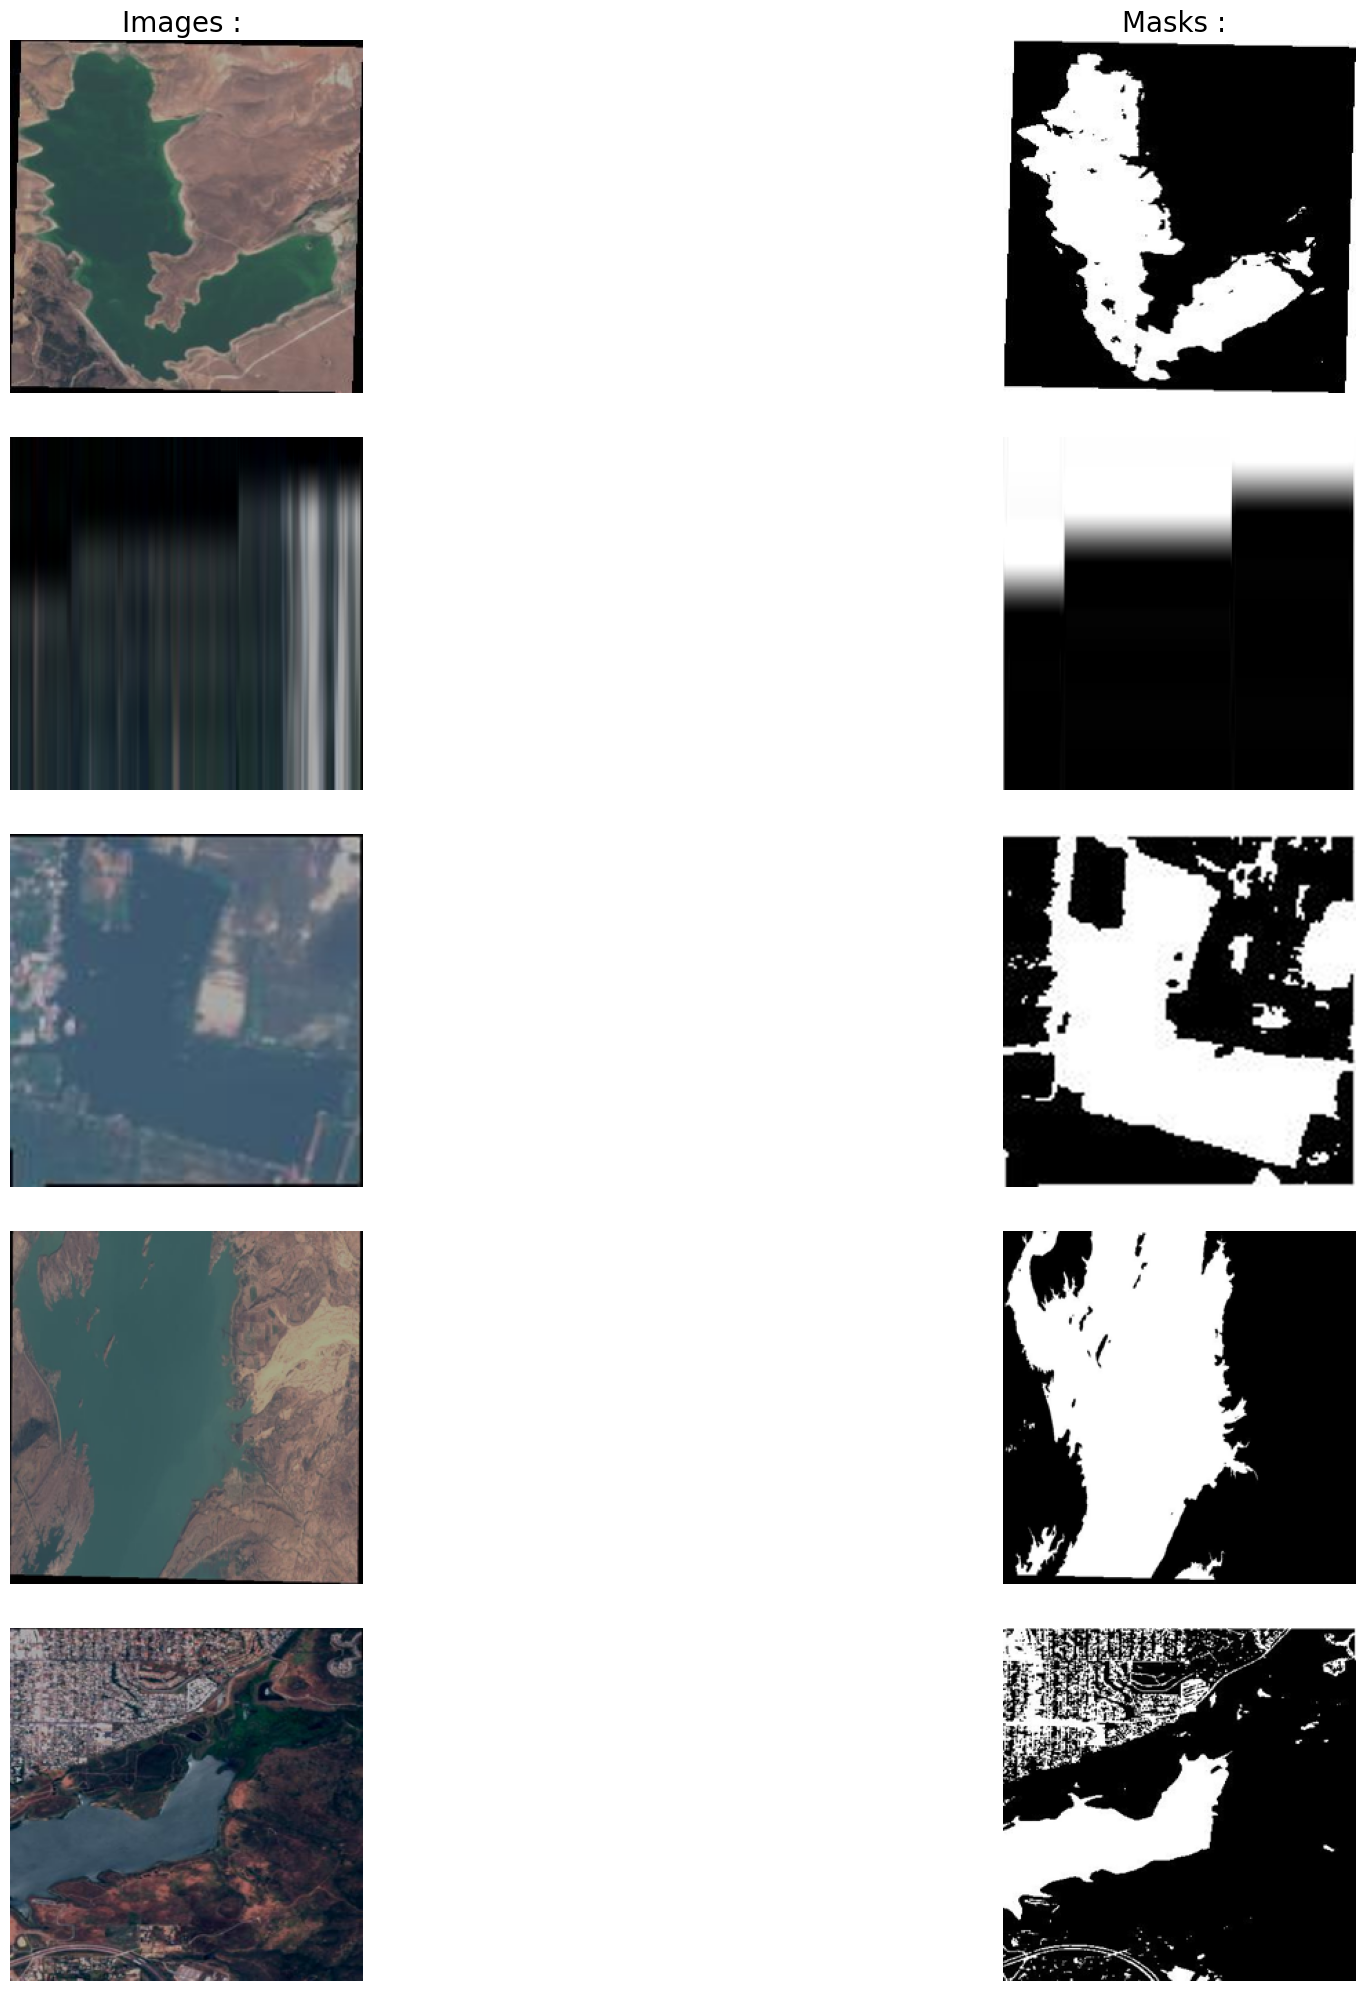

In [7]:
# Randomly generates 5 images and their corresponding masks
indeces = np.random.randint(0, len(IMAGES), 5)

fig, ax = plt.subplots(5, 2, figsize=(20, 20))
fig.tight_layout()
ax[0, 0].set_title("Images : ", fontsize=20)
ax[0, 1].set_title("Masks : ", fontsize=20)
for i, idx in enumerate(indeces):
    image = Image.open(IMG_DATA + "/" + IMAGES[idx])
    mask = Image.open(MASK_DATA + "/" + MASKS[idx])
    image = image.resize((256, 256))
    mask = mask.resize((256, 256))
    ax[i, 0].imshow(image)
    ax[i, 0].axis("off")
    ax[i, 1].imshow(mask)
    ax[i, 1].axis("off")

## Data Preparation

In [8]:
# Split the data into train and validation sets
split_size = 0.2
last_idx = int(np.floor((1 - split_size) * len(IMAGES)))
X_train = IMAGES[:last_idx]
Y_train = MASKS[:last_idx]
X_val = IMAGES[last_idx:]
Y_val = MASKS[last_idx:]

In [9]:
print(f"X_train contains {len(X_train)} images.")
print(f"Y_train contains {len(Y_train)} masks.")
print(f"X_val contains {len(X_val)} images.")
print(f"Y_val contains {len(Y_val)} masks.")

X_train contains 2272 images.
Y_train contains 2272 masks.
X_val contains 569 images.
Y_val contains 569 masks.


In [10]:
# Load the image and mask data as numpy arrays for the model
def load_data(data, img_id):
    path = data + "/" + img_id
    image = Image.open(path).convert("RGB")
    image = image.resize((256, 256))
    return np.asarray(image, dtype=np.uint8)

X_train_transformed = np.zeros((len(X_train), 256, 256, 3), dtype=np.uint8)

X_val_transformed = np.zeros((len(X_val), 256, 256, 3), dtype=np.uint8)

print("Loading Train Images : ")
for i in tqdm(range(len(X_train))):
    X_train_transformed[i] = load_data(IMG_DATA, X_train[i])

print("Loading Validataion Images : ")
for j in tqdm(range(len(X_val))):
    X_val_transformed[j] = load_data(IMG_DATA, X_val[j])

Loading Train Images : 


  0%|          | 0/2272 [00:00<?, ?it/s]

Loading Validataion Images : 


  0%|          | 0/569 [00:00<?, ?it/s]

In [11]:
# For masks we will use Luminance method
def rgbtogray(image):
    image = np.dot(image, [0.2989, 0.5870, 0.1140])
    image = np.expand_dims(image, axis=-1)
    return image.astype(np.bool_)

Y_train_transformed = np.zeros((len(Y_train), 256, 256, 1), dtype=np.uint8)
Y_val_transformed = np.zeros((len(Y_val), 256, 256, 1), dtype=np.bool_)

print("Loading Train Masks : ")
for i in tqdm(range(len(Y_train))):
    Y_train_transformed[i] = rgbtogray(load_data(MASK_DATA, Y_train[i]))

print("Loading Validation Masks : ")
for j in tqdm(range(len(Y_val))):
    Y_val_transformed[j] = rgbtogray(load_data(MASK_DATA, Y_val[j]))

Loading Train Masks : 


  0%|          | 0/2272 [00:00<?, ?it/s]

Loading Validation Masks : 


  0%|          | 0/569 [00:00<?, ?it/s]

In [12]:
print("The  shape of training images : ", X_train_transformed.shape)
print("The  shape of training masks : ", Y_train_transformed.shape)
print("The  shape of validation images : ", X_val_transformed.shape)
print("The  shape of validation masks : ", Y_val_transformed.shape)

The  shape of training images :  (2272, 256, 256, 3)
The  shape of training masks :  (2272, 256, 256, 1)
The  shape of validation images :  (569, 256, 256, 3)
The  shape of validation masks :  (569, 256, 256, 1)


## Model building

In [13]:
# Base-UNET Model

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

# Model is divided into 3 sections called Encoder, Bottleneck, Decoder

inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))
std_inputs = tf.keras.layers.Lambda(lambda x:x/255)(inputs)

### Encoder
# Convolutional block 1
conv1_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", kernel_initializer="he_normal")(std_inputs)
conv1_1 = tf.keras.layers.BatchNormalization()(conv1_1)
conv1_1 = tf.keras.layers.ReLU()(conv1_1)
conv1_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", kernel_initializer="he_normal")(conv1_1)
conv1_2 = tf.keras.layers.BatchNormalization()(conv1_2)
conv1_2 = tf.keras.layers.ReLU()(conv1_2)
pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1_2)

# Convolutional block 2
conv2_1 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same", kernel_initializer="he_normal")(pool1)
conv2_1 = tf.keras.layers.BatchNormalization()(conv2_1)
conv2_1 = tf.keras.layers.ReLU()(conv2_1)
conv2_2 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same", kernel_initializer="he_normal")(conv2_1)
conv2_2 = tf.keras.layers.BatchNormalization()(conv2_2)
conv2_2 = tf.keras.layers.ReLU()(conv2_2)
pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2_2)

# Convolutional block 3
conv3_1 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding="same", kernel_initializer="he_normal")(pool2)
conv3_1 = tf.keras.layers.BatchNormalization()(conv3_1)
conv3_1 = tf.keras.layers.ReLU()(conv3_1)
conv3_2 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding="same", kernel_initializer="he_normal")(conv3_1)
conv3_2 = tf.keras.layers.BatchNormalization()(conv3_2)
conv3_2 = tf.keras.layers.ReLU()(conv3_2)
pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3_2)

# Convolutional block 4
conv4_1 = tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding="same", kernel_initializer="he_normal")(pool3)
conv4_1 = tf.keras.layers.BatchNormalization()(conv4_1)
conv4_1 = tf.keras.layers.ReLU()(conv4_1)
conv4_2 = tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding="same", kernel_initializer="he_normal")(conv4_1)
conv4_2 = tf.keras.layers.BatchNormalization()(conv4_2)
conv4_2 = tf.keras.layers.ReLU()(conv4_2)
pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv4_2)

### Bottleneck
bn_conv_1 = tf.keras.layers.Conv2D(filters=1024, kernel_size=(3, 3), padding="same", kernel_initializer="he_normal")(pool4)
bn_conv_1 = tf.keras.layers.BatchNormalization()(bn_conv_1)
bn_conv_1 = tf.keras.layers.ReLU()(bn_conv_1)
bn_conv_2 = tf.keras.layers.Conv2D(filters=1024, kernel_size=(3, 3), padding="same", kernel_initializer="he_normal")(bn_conv_1)
bn_conv_2 = tf.keras.layers.BatchNormalization()(bn_conv_2)
bn_conv_2 = tf.keras.layers.ReLU()(bn_conv_2)

### Decoder
# Reverse Convolutional Block 1
upconv1 = tf.keras.layers.Conv2DTranspose(filters=512, kernel_size=(2, 2), strides=(2, 2), padding="same", kernel_initializer="he_normal")(bn_conv_2)
upconv1 = tf.keras.layers.Concatenate()([conv4_2, upconv1])
conv5_1 = tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding="same", kernel_initializer="he_normal")(upconv1)
conv5_1 = tf.keras.layers.BatchNormalization()(conv5_1)
conv5_1 = tf.keras.layers.ReLU()(conv5_1)
conv5_2 = tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding="same", kernel_initializer="he_normal")(conv5_1)
conv5_2 = tf.keras.layers.BatchNormalization()(conv5_2)
conv5_2 = tf.keras.layers.ReLU()(conv5_2)

# Reverse Convolutional Block 2
upconv2 = tf.keras.layers.Conv2DTranspose(filters=256, kernel_size=(2, 2), strides=(2, 2), padding="same", kernel_initializer="he_normal")(conv5_2)
upconv2 = tf.keras.layers.Concatenate()([conv3_2, upconv2])
conv6_1 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding="same", kernel_initializer="he_normal")(upconv2)
conv6_1 = tf.keras.layers.BatchNormalization()(conv6_1)
conv6_1 = tf.keras.layers.ReLU()(conv6_1)
conv6_2 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding="same", kernel_initializer="he_normal")(conv6_1)
conv6_2 = tf.keras.layers.BatchNormalization()(conv6_2)
conv6_2 = tf.keras.layers.ReLU()(conv6_2)

# Reverse Convolutional Block 3
upconv3 = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=(2, 2), strides=(2, 2), padding="same", kernel_initializer="he_normal")(conv6_2)
upconv3 = tf.keras.layers.Concatenate()([conv2_2, upconv3])
conv7_1 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same", kernel_initializer="he_normal")(upconv3)
conv7_1 = tf.keras.layers.BatchNormalization()(conv7_1)
conv7_1 = tf.keras.layers.ReLU()(conv7_1)
conv7_2 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same", kernel_initializer="he_normal")(conv7_1)
conv7_2 = tf.keras.layers.BatchNormalization()(conv7_2)
conv7_2 = tf.keras.layers.ReLU()(conv7_2)

# Reverse Convolutional Block 4
upconv4 = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=(2, 2), strides=(2, 2), padding="same", kernel_initializer="he_normal")(conv7_2)
upconv4 = tf.keras.layers.Concatenate()([conv1_2, upconv4])
conv8_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", kernel_initializer="he_normal")(upconv4)
conv8_1 = tf.keras.layers.BatchNormalization()(conv8_1)
conv8_1 = tf.keras.layers.ReLU()(conv8_1)
conv8_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", kernel_initializer="he_normal")(conv8_1)
conv8_2 = tf.keras.layers.BatchNormalization()(conv8_2)
conv8_2 = tf.keras.layers.ReLU()(conv8_2)

outputs = tf.keras.layers.Conv2D(filters=1, kernel_size=(1, 1), activation="sigmoid")(conv8_2)

In [14]:
unet = tf.keras.Model(inputs=[inputs], outputs=[outputs])
unet.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 256, 256,  │          0 │ input_layer[0][0] │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ lambda[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 256, 256,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ re_lu[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 256, 256,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ re_lu_1[0][0]     │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ re_lu_2[0][0]     │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ re_lu_3[0][0]     │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[

 Total params: 31,055,297 (118.47 MB)

 Trainable params: 31,043,521 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

In [15]:
LR = 1e-4
optimizer = tf.keras.optimizers.Adam(LR)
unet.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                 factor=0.5,
                                 patience=5,
                                 min_lr=1e-6,
                                 verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                  patience=10,
                                  restore_best_weights=True,
                                  mode="min",
                                  verbose=1)
]

In [ ]:
history = unet.fit(x=X_train_transformed,
                   y=Y_train_transformed,
                   batch_size=32,
                   epochs=50,
                   validation_data=(X_val_transformed, Y_val_transformed),
                   callbacks=callbacks
                  )

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 256, 256, 3))
  warnings.warn(msg)


### Comparison plots of training accuracy vs. validation accuracy

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["train accuracy", "val accuracy"])
plt.show()

### Comparioson plots for training loss and validation loss

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train loss", "val loss"])
plt.show()

## Prediction Results

In [ ]:
indeces = np.random.randint(0, len(IMAGES), 5)

fig, ax = plt.subplots(5, 3, figsize=(20, 20))
fig.tight_layout()
ax[0, 0].set_title("Images : ", fontsize=20)
ax[0, 1].set_title("Masks : ", fontsize=20)
ax[0, 2].set_title("Predicted Masks : ", fontsize=20)
for i, idx in enumerate(indeces):
    image = Image.open(IMG_DATA + "/" + IMAGES[idx])
    mask = Image.open(MASK_DATA + "/" + MASKS[idx])
    image = image.resize((256, 256))
    mask = mask.resize((256, 256))
    predicted_mask = unet.predict(np.expand_dims(np.asarray(image, dtype=np.uint8), axis=0))
    predicted_mask = np.squeeze(predicted_mask)
    predicted_mask = ((predicted_mask > 0.5) *255).astype(np.uint8)
    pred_img = Image.fromarray(predicted_mask)
    pred_img.save(f"Predicted_mask-{i}.png")
    ax[i, 0].imshow(image)
    ax[i, 0].axis("off")
    ax[i, 1].imshow(mask)
    ax[i, 1].axis("off")
    ax[i, 2].imshow(predicted_mask, cmap="gray")
    ax[i, 2].axis("off")